In [73]:
import pandas as pd
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv"
df = pd.read_csv(url)


In [74]:
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,num-of-cylinders,engine-type,curb-weight,height,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,4,dohc,2548,48.8,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,4,dohc,2548,48.8,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,6,ohcv,2823,52.4,65.5,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,4,ohc,2337,54.3,66.2,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,5,ohc,2824,54.3,66.4,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,4,ohc,2952,55.5,68.9,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,4,ohc,3049,55.5,68.8,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,6,ohcv,3012,55.5,68.9,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,6,ohc,3217,55.5,68.9,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


### Ada beberapa kolom yang bukan numerik, maka preprocessing dulu

In [75]:
df.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
symboling              int64
dtype: object

In [76]:
df['engine-type'].value_counts()

engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [77]:
df['fuel-system'].value_counts()


fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [78]:
df['engine-location'].value_counts()


engine-location
front    202
rear       3
Name: count, dtype: int64

In [79]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [80]:
df['body-style'].value_counts()

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [81]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [82]:
df['fuel-type'].value_counts()

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

In [83]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64

## Preprocessing
##### 1. Drop NaN rows
##### 2. Ubah tipe data object menjadi kategorikal numerik
##### 3. Normalisasi Data

In [84]:
# Drop NaN
df = df.dropna()
df


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,num-of-cylinders,engine-type,curb-weight,height,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,4,ohc,2337,54.3,66.2,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,5,ohc,2824,54.3,66.4,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,5,ohc,2844,55.7,71.4,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0,1
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,5,ohc,3086,55.9,71.4,192.7,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0,1
10,16430.0,29,23,5800.0,101.0,8.8,2.80,3.50,mpfi,108,4,ohc,2395,54.3,64.8,176.8,101.2,front,rwd,sedan,2.0,std,gas,bmw,192.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,4,ohc,2952,55.5,68.9,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,4,ohc,3049,55.5,68.8,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,6,ohcv,3012,55.5,68.9,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,6,ohc,3217,55.5,68.9,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [85]:
# Ubah tipe data object menjadi kategorikal numerik
object_type = ['fuel-system', 'engine-location', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make', 'engine-type']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in object_type:
    df.loc[:, i] = le.fit_transform(df[i])

df


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,num-of-cylinders,engine-type,curb-weight,height,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,4,109,4,2,2337,54.3,66.2,176.6,99.8,0,1,3,4.0,0,1,0,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,4,136,5,2,2824,54.3,66.4,176.6,99.4,0,0,3,4.0,0,1,0,164.0,2
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,4,136,5,2,2844,55.7,71.4,192.7,105.8,0,1,3,4.0,0,1,0,158.0,1
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,4,131,5,2,3086,55.9,71.4,192.7,105.8,0,1,3,4.0,1,1,0,158.0,1
10,16430.0,29,23,5800.0,101.0,8.8,2.80,3.50,4,108,4,2,2395,54.3,64.8,176.8,101.2,0,2,3,2.0,0,1,1,192.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,4,141,4,2,2952,55.5,68.9,188.8,109.1,0,2,3,4.0,0,1,17,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,4,141,4,2,3049,55.5,68.8,188.8,109.1,0,2,3,4.0,1,1,17,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,4,173,6,4,3012,55.5,68.9,188.8,109.1,0,2,3,4.0,0,1,17,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,2,145,6,2,3217,55.5,68.9,188.8,109.1,0,2,3,4.0,1,0,17,95.0,-1


In [86]:
df.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
symboling              int64
dtype: object

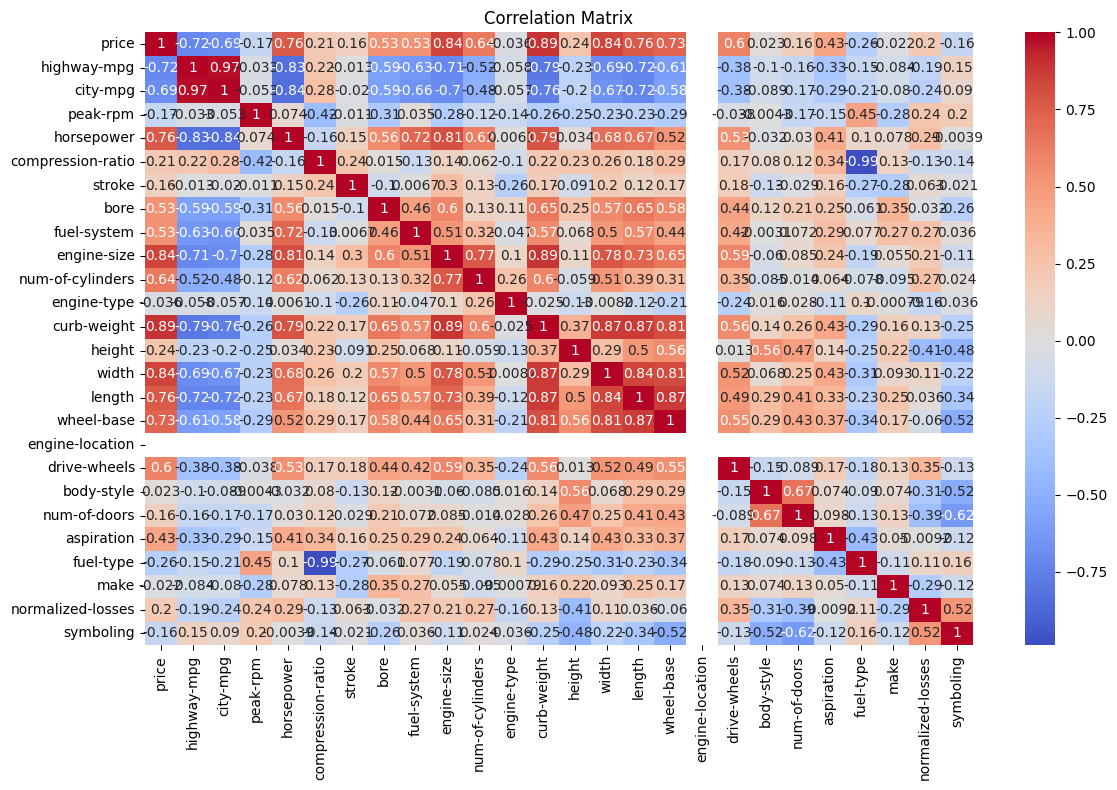

In [87]:
corr = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()

In [88]:
# Drop Korelasi Negatif
# neg_corr = ['price', 'compression-ratio', 'bore', 'engine-location', 'engine-size', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'drive-wheels', 'body-style', 'num-of-doors', 'make']
# df = df.drop(columns=neg_corr)


In [89]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop(columns=['symboling'])
y = df['symboling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)


# Models

#### 1. Linear Regression

gression

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


y_pred_lin_reg = lin_reg.predict(X_test)


#### 2. Decision Tree Regression

In [91]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train, y_train)

y_pred_dec_tree = dec_tree.predict(X_test)


### 3. XGBoost Regressor 

In [92]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

# Evaluasi

In [93]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

rmse_lin_reg = root_mean_squared_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f"RMSE Linear Regression: {rmse_lin_reg}")
print(f"MSE Linear Regression: {mse_lin_reg}")
print(f"R2 Linear Regression: {r2_lin_reg}")


RMSE Linear Regression: 0.6970554682078666
MSE Linear Regression: 0.4858863257584881
R2 Linear Regression: 0.6689636742670048


In [94]:
rmse_dec_tree = root_mean_squared_error(y_test, y_pred_dec_tree)
mse_dec_tree = mean_squared_error(y_test, y_pred_dec_tree)
r2_dec_tree = r2_score(y_test, y_pred_dec_tree)

print(f"RMSE Decision Tree: {rmse_dec_tree}")
print(f"MSE Decision Tree: {mse_dec_tree}")
print(f"R2 Decision Tree: {r2_dec_tree}")

RMSE Decision Tree: 0.6373774391990981
MSE Decision Tree: 0.40625
R2 Decision Tree: 0.7232202262142382


In [95]:
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE XGBoost: {rmse_xgb}")
print(f"MSE XGBoost: {mse_xgb}")
print(f"R2 XGBoost: {r2_xgb}")

RMSE XGBoost: 0.6018826365470886
MSE XGBoost: 0.3622627258300781
R2 XGBoost: 0.753188967704773


In [96]:
# import matplotlib.pyplot as plt
# import numpy as np

# plt.figure(figsize=(12, 8))

# plt.scatter(y_test, y_pred_lin_reg, color='#2ecc71', alpha=0.5, label='Predictions')

# min_val = min(min(y_test), min(y_pred_lin_reg))
# max_val = max(max(y_test), max(y_pred_lin_reg))
# plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Predictions')

# plt.title('Linear Regression: Actual vs Predicted Values', fontsize=14, pad=20)
# plt.xlabel('Actual Values', fontsize=12)
# plt.ylabel('Predicted Values', fontsize=12)
# plt.legend(fontsize=10)
# plt.grid(True, linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()

RMSE XGBoost: 0.6018826365470886
MSE XGBoost: 0.3622627258300781
R2 XGBoost: 0.753188967704773

RMSE Decision Tree: 0.6373774391990981
MSE Decision Tree: 0.40625
R2 Decision Tree: 0.7232202262142382

RMSE Linear Regression: 0.6970554682078666
MSE Linear Regression: 0.4858863257584881
R2 Linear Regression: 0.6689636742670048

## Kesimpulan Perbandingan Model

Berdasarkan hasil evaluasi ketiga model, dapat disimpulkan:

1. **XGBoost** menunjukkan performa terbaik dengan:
   - RMSE terendah (0.602)
   - MSE terendah (0.362)
   - R² tertinggi (0.753)
   
   Ini menunjukkan bahwa XGBoost mampu menjelaskan sekitar 75.3% variasi dalam data dan memiliki tingkat kesalahan prediksi yang paling rendah.

2. **Decision Tree** menempati posisi kedua dengan:
   - RMSE: 0.637
   - MSE: 0.406
   - R²: 0.723
   
   Model ini sedikit lebih lemah dibandingkan XGBoost, namun masih cukup baik dalam memprediksi harga.

3. **Linear Regression** menunjukkan performa terendah dengan:
   - RMSE tertinggi (0.697)
   - MSE tertinggi (0.486)
   - R² terendah (0.669)
   
   Meskipun demikian, model ini masih dapat menjelaskan sekitar 66.9% variasi dalam data.

Secara keseluruhan, model ensemble seperti XGBoost terbukti lebih unggul dalam memprediksi harga mobil dibandingkan dengan model Decision Tree sederhana dan Linear Regression.

## Linear Regression, XGBoost, RMSE, MSE, dan R²

### 1. **Linear Regression**
Linear Regression adalah metode statistika untuk memodelkan hubungan antara variabel independen (X) dan variabel dependen (Y) dengan mencari garis lurus terbaik yang meminimalkan kesalahan prediksi.

Persamaan Linear Regression:
$$
Y = \beta_0 + \beta_1 X + \epsilon
$$
Dimana:
- $Y$ adalah variabel dependen (target/output).
- $X$ adalah variabel independen (fitur/input).
- $\beta_0$ adalah intercept (konstanta).
- $\beta_1$ adalah koefisien regresi.
- $\epsilon$ adalah error atau residual.

### 2. **XGBoost (eXtreme Gradient Boosting)**
XGBoost adalah algoritma ensemble learning yang menggunakan teknik boosting untuk meningkatkan performa prediksi. XGBoost bekerja dengan membangun model secara sekuensial dimana setiap model baru berusaha memperbaiki kesalahan dari model sebelumnya.

Fungsi objektif XGBoost:
$$
Obj = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

Dimana:
- $l(y_i, \hat{y}_i)$ adalah fungsi loss yang mengukur perbedaan antara prediksi dan nilai sebenarnya
- $\Omega(f_k)$ adalah term regularisasi untuk mencegah overfitting
- $f_k$ adalah fungsi pohon keputusan ke-k

XGBoost menggunakan pendekatan gradient descent untuk meminimalkan fungsi objektif ini, dengan formula update:
$$
\hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta f_t(x_i)
$$

Dimana:
- $\hat{y}_i^{(t)}$ adalah prediksi pada iterasi ke-t
- $\eta$ adalah learning rate
- $f_t(x_i)$ adalah pohon baru yang ditambahkan

### 3. **Mean Squared Error (MSE)**
MSE mengukur rata-rata kesalahan kuadrat antara nilai aktual dan nilai prediksi:
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Semakin kecil MSE, semakin baik model.

##4. **Root Mean Squared Error (RMSE)**
RMSE adalah akar kuadrat dari MSE:
$$
RMSE = \sqrt{MSE}
$$
Menginterpretasikan kesalahan dalam satuan yang sama dengan variabel target.

### 5. **R-squared (R²)**
R² mengukur seberapa baik model menjelaskan variabilitas data:
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$
Dimana:
- $SS_{res}$ adalah jumlah kuadrat residual.
- $SS_{tot}$ adalah jumlah kuadrat total.

Nilai R² berkisar antara 0 hingga 1, semakin mendekati 1 semakin baik model dalam menjelaskan data.
